# Selenium을 통한 Webscraping

### Basics

In [229]:
from selenium import webdriver

In [230]:
# auto-reload 설정
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [231]:
# chromedriver 경로 확인
!dir .\chromedriver.exe

 Volume in drive C is Windows
 Volume Serial Number is 3838-B871

 Directory of C:\Users\sori-\Desktop\DS_webscraping

06/25/2021  09:46 AM        11,107,328 chromedriver.exe
               1 File(s)     11,107,328 bytes
               0 Dir(s)  150,981,226,496 bytes free


In [232]:
# webdriver가 직접 request를 보내는 역할을 한다
driver = webdriver.Chrome('./chromedriver.exe')        # 현재 디렉토리 밑에 있으면 경로 지정하지 않아도 알아서 찾음
driver

<selenium.webdriver.chrome.webdriver.WebDriver (session="f8382aefb11d6fce741b989d1c039069")>

In [233]:
# 웹사이트 불러오기
d = driver.get('https://www.naver.com')                # 위 chromedriver 창이 열린 뒤에만 실행 가능함
type(d)

NoneType

(str,
 '<html lang="ko" data-dark="false" data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.114 Safari/537.36"><head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"> <meta name="robots" content="index,nofollow"> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/m
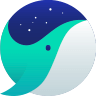
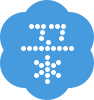

In [234]:
# 페이지 가져오기
pg = driver.page_source
type(pg), pg                        # html 내용을 str으로 가져온다

---
## Genie Chart Scraping
이하 모든 웹사이트는 교육 목적으로만 사용되었습니다. <br>
https://www.genie.co.kr/chart/top200

In [235]:
browser = webdriver.Chrome()
browser.get('https://www.genie.co.kr/chart/top200')

In [236]:
# html str 가져오기
html = browser.page_source

In [237]:
soup = BS(html, 'html.parser')
soup

<html class="js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" dir="ltr" lang="ko" style=""><head>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<!--[if lte IE 6]><html dir="ltr" class="no-js ie6"><![endif]-->
<!--[if lte IE 7]><html dir="ltr" class="no-js ie7"><![endif]-->
<!--[if IE 8]><html dir="ltr" class="no-js ie8"><![endif]-->
<!--[if IE 9]><html dir="ltr" class="no-js ie9"><![endif]-->
<!--[if (gte IE 10)|!(IE)]><!--><!--<![endif]-->
<title>지니차트&gt;실시간 - 지니</title>
<meta charset="utf-8"/>
<meta content="d17289f97c7f294985a9b0eb3649a45ac5ceeee2" name="naver-site-verificatio

In [238]:
# 1~50위 차트
tags = soup.select('td.info')
type(tags), len(tags), tags[0]            # 태그 안에 태그가 또 있고 그 다음에 text가 들어있는 구조

(bs4.element.ResultSet,
 50,
 <td class="info">
 <a class="title ellipsis" href="#" onclick="fnPlaySong('93619160','1');return false;" title="재생">
                                         
                                             
                                         
                                         
                                         
                                         
                                             
                                                 바라만 본다</a>
 <a class="artist ellipsis" href="#" onclick="fnViewArtist('81123111');return false;">MSG워너비 (M.O.M)</a>
 <div class="toggle-button-box">
 <button class="btn artist-etc" onclick="fnRelationArtistList('93619160');" type="button">외</button>
 <ul class="list" id="RelationArtist_93619160"></ul>
 </div>
 <i class="bar">|</i>
 <a class="albumtitle ellipsis" href="#" onclick="fnViewAlbumLayer('82110804');return false;">MSG워너비 1집</a>
 </td>)

In [251]:
# 태그 안에 글자가 여러개 -> strip 하더라도 중간에 낀 space는 제거할 수 없음
tags[0].text.strip()

'바라만 본다\nMSG워너비 (M.O.M)\n\n외\n\n\n|\nMSG워너비 1집'

In [253]:
tags[0].text.strip().replace('\n', ' ')       # 공백 제거 가능하지만 번거로움

'바라만 본다 MSG워너비 (M.O.M)  외   | MSG워너비 1집'

**해결방안**: 원하는 각 텍스트를 태그로 특정할 수 있을 때까지 **select() 반복**

In [91]:
# 곡명 가져오기
title = tags[0].select('a.title')           # 하나 가져오더라도 ResultSet
title[0].text.strip()                       # \n 없에는 strip()이 중요!!

'하루만 더'

In [97]:
# 가수 이름 가져오기
artist = tags[0].select('a.artist')
artist[0].text.strip()

'빅마마 (Big Mama)'

In [99]:
# 전체 tags에 대한 for loop
ranks = []

for tag in tags:
    title = tag.select('a.title')[0].text.strip()
    artist = tag.select('a.artist')[0].text.strip()
    rank = [title, artist]
    ranks.append(rank)
ranks

[['하루만 더', '빅마마 (Big Mama)'],
 ['치맛바람 (Chi Mat Ba Ram)', '브레이브걸스 (Brave girls)'],
 ['Butter', '방탄소년단'],
 ['Next Level', 'aespa'],
 ['Alcohol-Free', 'TWICE (트와이스)'],
 ['비와 당신', '이무진'],
 ['헤픈 우연', '헤이즈 (Heize)'],
 ['Dun Dun Dance', '오마이걸 (OH MY GIRL)'],
 ['추적이는 여름 비가 되어', '장범준'],
 ["롤린 (Rollin')", '브레이브걸스 (Brave girls)'],
 ['안녕 (Hello)', '조이 (JOY)'],
 ['Peaches (Feat. Daniel Caesar & Giveon)', 'Justin Bieber'],
 ['라일락', '아이유 (IU)'],
 ['Dynamite', '방탄소년단'],
 ['운전만해 (We Ride)', '브레이브걸스 (Brave girls)'],
 ['Ready to love', '세븐틴 (SEVENTEEN)'],
 ['ASAP', 'STAYC (스테이씨)'],
 ['신호등', '이무진'],
 ['상상더하기', 'MSG워너비 TOP 8 (별루지 & 김정수 & 강창모 & 정기석 & 이동휘 & 이상이 & 박재정 & 원슈타인)'],
 ['Celebrity', '아이유 (IU)'],
 ['상상더하기', '라붐 (LABOUM)'],
 ['이제 나만 믿어요', '임영웅'],
 ['Timeless', 'SG워너비'],
 ['Savage Love (Laxed - Siren Beat) (BTS Remix)',
  'Jawsh 685 & Jason Derulo & 방탄소년단'],
 ['다정히 내 이름을 부르면', '경서예지 & 전건호'],
 ['별빛 같은 나의 사랑아', '임영웅'],
 ['HERO', '임영웅'],
 ['어떤 말도 할 수가 없는 나인데', '케이시 (Kassy)'],
 ['작은 것들을 위한 시 (Boy With Luv

#### Dataframe으로 만들기

In [100]:
import pandas as pd

In [108]:
genie = pd.DataFrame(ranks, columns=['Title', 'Artist'], index=range(1, 51))    # index: 순위
genie.head()

,Title,Artist
1,하루만 더,빅마마 (Big Mama)
2,치맛바람 (Chi Mat Ba Ram),브레이브걸스 (Brave girls)
3,Butter,방탄소년단
4,Next Level,aespa
5,Alcohol-Free,TWICE (트와이스)


#### Excel 파일로 저장하기

In [119]:
genie.to_excel('./storage/genie.xlsx', header=True, index=True) 
print('파일이 저장되었습니다----------------------------------')

파일이 저장되었습니다----------------------------------


#### 저장한 excel 파일을 불러오기

In [123]:
g = pd.read_excel('./storage/genie.xlsx', header=0, index_col=0)
g.head()

,Title,Artist
1,하루만 더,빅마마 (Big Mama)
2,치맛바람 (Chi Mat Ba Ram),브레이브걸스 (Brave girls)
3,Butter,방탄소년단
4,Next Level,aespa
5,Alcohol-Free,TWICE (트와이스)


---
## Melon Chart Scraping
https://www.melon.com/chart/

In [131]:
browser = webdriver.Chrome()
browser.get('https://www.melon.com/chart/')

In [132]:
# 웹페이지를 str으로 가져온다
html_str = browser.page_source
html_str

'<html lang="ko" class="narrow-screen"><head>\n\t\t\n\t\n\t\n\t\n\t\n\t\n\t\n\t\n\n\t<meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n\t\n\n\t\n\n\t\n\n\t<title>멜론차트&gt;24H&gt;멜론</title>\n\t<meta name="keywords" content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널">\n\t<meta name="description" content="국내 최다 4,000만곡 보유, No.1 뮤직플랫폼 멜론! 최신 트렌드부터 나를 아는 똑똑한 음악추천까지!">\n\t<meta name="naver-site-verification" content="e2b43191afa0f1d2deb8e2cda8f45ee1408c44a1">\n\t<meta property="fb:app_id" content="357952407588971">\n\t<meta property="og:title" content="Melon">\n\t<meta property="og:image" content="https://cdnimg.melon.co.kr/resource/image/web/common/logo_melon142x99.png">\n\t<meta property="og:description" content="음악이 필요한 순간, 멜론">\n\t<meta property="og:url" content="http://www.melon.com/chart/">\n\t<meta property="og:type" content="website">\n\t<meta name="viewport" cont

#### 불러온 내용은 BeautifulSoup으로 분석

In [43]:
from bs4 import BeautifulSoup as BS

In [133]:
soup = BS(html_str, 'html.parser')
soup

<html class="narrow-screen" lang="ko"><head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<title>멜론차트&gt;24H&gt;멜론</title>
<meta content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널" name="keywords"/>
<meta content="국내 최다 4,000만곡 보유, No.1 뮤직플랫폼 멜론! 최신 트렌드부터 나를 아는 똑똑한 음악추천까지!" name="description"/>
<meta content="e2b43191afa0f1d2deb8e2cda8f45ee1408c44a1" name="naver-site-verification"/>
<meta content="357952407588971" property="fb:app_id"/>
<meta content="Melon" property="og:title"/>
<meta content="https://cdnimg.melon.co.kr/resource/image/web/common/logo_melon142x99.png" property="og:image"/>
<meta content="음악이 필요한 순간, 멜론" property="og:description"/>
<meta content="http://www.melon.com/chart/" property="og:url"/>
<meta content="website" property="og:type"/>
<meta content="width=device-width" name="viewport"/>
<link href="/favicon.ico?2" id="favicon" rel="shortcut i

In [147]:
# 곡 제목, 가수 이름 select
tags = soup.select('tr[data-song-no]')
type(tags), len(tags), tags                # 곡 제목 div tag, 가수 이름 div tag,... 순으로 출력

(bs4.element.ResultSet,
 100,
 [<tr data-song-no="33487342">
  <td><div class="wrap t_right"><input class="input_check" name="input_check" title="Next Level 곡 선택" type="checkbox" value="33487342"/></div></td>
  <td><div class="wrap">
  <a class="image_typeAll" href="javascript:melon.link.goAlbumDetail('10609232');" title="Next Level">
  <img alt="Next Level - 페이지 이동" height="60" onerror="WEBPOCIMG.defaultAlbumImg(this);" src="https://cdnimg.melon.co.kr/cm2/album/images/106/09/232/10609232_20210517155130_500.jpg/melon/resize/120/quality/80/optimize" width="60"/>
  <span class="bg_album_frame"></span>
  </a>
  </div></td>
  <td><div class="wrap">
  <a class="btn button_icons type03 song_info" href="javascript:melon.link.goSongDetail('33487342');" title="Next Level 곡정보"><span class="none">곡정보</span></a>
  </div></td>
  <td><div class="wrap">
  <div class="wrap_song_info">
  <div class="ellipsis rank01"><span>
  <a href="javascript:melon.play.playSong('19030101',33487342);" title="Next Lev

In [225]:
# ResultSet의 for loop
ranks = []

for tag in tags:
    title = tag.select('.rank01')[0].text.strip()
    artist = tag.select('.rank02 > a')[0].text.strip()
    rank = [title, artist]
    ranks.append(rank)
ranks

[['Next Level', 'aespa'],
 ['Butter', '방탄소년단'],
 ['헤픈 우연', '헤이즈 (Heize)'],
 ['치맛바람 (Chi Mat Ba Ram)', '브레이브걸스'],
 ['Dun Dun Dance', '오마이걸 (OH MY GIRL)'],
 ['Peaches (Feat. Daniel Caesar & Giveon)', 'Justin Bieber'],
 ["롤린 (Rollin')", '브레이브걸스'],
 ['Alcohol-Free', 'TWICE (트와이스)'],
 ['라일락', '아이유'],
 ['ASAP', 'STAYC(스테이씨)'],
 ['운전만해 (We Ride)', '브레이브걸스'],
 ['Dynamite', '방탄소년단'],
 ['Celebrity', '아이유'],
 ['비와 당신', '이무진'],
 ['안녕 (Hello)', '조이 (JOY)'],
 ['상상더하기', 'MSG워너비 TOP 8 (별루지, 김정수, 강창모, 정기석, 이동휘, 이상이, 박재정, 원슈타인)'],
 ['상상더하기', '라붐 (LABOUM)'],
 ['사이렌 Remix (Feat. UNEDUCATED KID, Paul Blanco)', '호미들'],
 ['Timeless', 'SG 워너비'],
 ['내 손을 잡아', '아이유'],
 ['멜로디', 'ASH ISLAND'],
 ['밝게 빛나는 별이 되어 비춰줄게', '송이한'],
 ['신호등', '이무진'],
 ['마.피.아. In the morning', 'ITZY (있지)'],
 ['라라라', 'SG 워너비'],
 ['LOVE DAY (2021) (바른연애 길잡이 X 양요섭, 정은지)', '양요섭'],
 ['밤하늘의 별을(2020)', '경서'],
 ['Savage Love (Laxed - Siren Beat) (BTS Remix)', 'Jawsh 685'],
 ['Lovesick Girls', 'BLACKPINK'],
 ['Coin', '아이유'],
 ['Dolphin', '오마이걸 (OH 

#### Dataframe으로 만들기

In [157]:
import pandas as pd

In [160]:
pd.DataFrame(ranks, columns=['제목', '가수'], index=range(1, 101)).head()

,제목,가수
1,Next Level,aespa
2,Butter,방탄소년단
3,헤픈 우연,헤이즈 (Heize)
4,치맛바람 (Chi Mat Ba Ram),브레이브걸스
5,Dun Dun Dance,오마이걸 (OH MY GIRL)


---
## Ticket Sales Scraping
Dataframe의 한 행에 들어올 정보는 한번에 select하고, 이후 각각의 요소를 뽑아내기 위해 for loop을 통해 다시 select

In [193]:
browser = webdriver.Chrome()
browser.get('http://ticket.interpark.com/Contents/Ranking?smid1=s_menu&smid2=performance')

In [194]:
page = browser.page_source

In [195]:
soup = BS(page, 'html.parser')

In [196]:
# 한 행에 들어오는 Genre, Perfomance, Date 정보를 모두 담는 tag를 선택함
tck = soup.select('div.rankingContent')[1:]         # 0번째는 필요없는 정보
type(tck), tck[0]                                   # slicing 하는 순간 list로 바뀜

(list,
 <div class="rankingContent">
 <div class="genreList">
 <div class="genreTitle"></div>
 <ul>
 <li class="depth1"><a class="selected" data-cate="01011" data-kind="01011" href="javascript:;" onclick="fnRenderSubCate(this, '01011', 'D');">전체</a><img alt="" onclick="listBtnClick(jQuery(this));" src="http://ticketimage.interpark.com/TicketImage/2016/20160308_ranking/main/img/listBtn.png" style="padding-left:3px;cursor:pointer;"/></li>
 <li class="letter1"><a data-cate="RK312" data-kind="01011" href="javascript:;" onclick="fnRenderSubCate(this, 'RK312', 'D');">- 라이선스/내한</a></li>
 <li class=""><a data-cate="RK311" data-kind="01011" href="javascript:;" onclick="fnRenderSubCate(this, 'RK311', 'D');">- 창작</a></li>
 </ul>
 </div>
 <a class="prev" href="javascript:;"></a>
 <a class="next" href="javascript:;"></a>
 <div class="genreItems">
 <a class="moreBtn" href="javascript:;" onclick="fnRankingMore(this, '01011', 'D')">더보기</a>
 <div class="itemWrap custom_01011" style="width: 3920px; left

아래 스크래핑을 하다보니 알았는데, 장르는 이미지라서 글씨를 스크래핑 수가 없다. 웹페이지 상단의 메뉴가 장르 구분과 일치하여서 이 부분을 스크래핑해서 list에 넣고, 이후 index로 사용하는 방법으로 진행한다.

In [197]:
# 메뉴에서 장르명만 스크래핑 하기 - df의 index가 될 부분
genre = soup.select('div.gnbWrap > ul > li > a > img')[1:9]         # ResultSet을 slicing해서 list
genre

[<img alt="뮤지컬" src="http://ticketimage.interpark.com/TicketImage/2015/20150429_main/img/header/blank.png"/>,
 <img alt="콘서트" src="http://ticketimage.interpark.com/TicketImage/2015/20150429_main/img/header/blank.png"/>,
 <img alt="연극" src="http://ticketimage.interpark.com/TicketImage/2015/20150429_main/img/header/blank.png"/>,
 <img alt="클래식/무용" src="http://ticketimage.interpark.com/TicketImage/2015/20150429_main/img/header/blank.png"/>,
 <img alt="스포츠" src="http://ticketimage.interpark.com/TicketImage/2015/20150429_main/img/header/blank.png"/>,
 <img alt="레저" src="http://ticketimage.interpark.com/TicketImage/2015/20150429_main/img/header/blank.png"/>,
 <img alt="전시/행사" src="http://ticketimage.interpark.com/TicketImage/2015/20150429_main/img/header/blank.png"/>,
 <img alt="아동/가족" src="http://ticketimage.interpark.com/TicketImage/2015/20150429_main/img/header/blank.png"/>]

In [211]:
# 속성 alt에 접근하려면 Tag object여야 한다 - for loop
g_titles =[]

for g in genre:
    g_titles.append(g['alt'])                               # 장르
g_titles    

['뮤지컬', '콘서트', '연극', '클래식/무용', '스포츠', '레저', '전시/행사', '아동/가족']

In [213]:
# 장르마다 25개의 공연이 있어서, 하나의 장르이름이 25번 반복되어야 한다
idx = []

for i in range(len(g_titles)):
    idx += [g_titles[i]] * 25
idx

['뮤지컬',
 '뮤지컬',
 '뮤지컬',
 '뮤지컬',
 '뮤지컬',
 '뮤지컬',
 '뮤지컬',
 '뮤지컬',
 '뮤지컬',
 '뮤지컬',
 '뮤지컬',
 '뮤지컬',
 '뮤지컬',
 '뮤지컬',
 '뮤지컬',
 '뮤지컬',
 '뮤지컬',
 '뮤지컬',
 '뮤지컬',
 '뮤지컬',
 '뮤지컬',
 '뮤지컬',
 '뮤지컬',
 '뮤지컬',
 '뮤지컬',
 '콘서트',
 '콘서트',
 '콘서트',
 '콘서트',
 '콘서트',
 '콘서트',
 '콘서트',
 '콘서트',
 '콘서트',
 '콘서트',
 '콘서트',
 '콘서트',
 '콘서트',
 '콘서트',
 '콘서트',
 '콘서트',
 '콘서트',
 '콘서트',
 '콘서트',
 '콘서트',
 '콘서트',
 '콘서트',
 '콘서트',
 '콘서트',
 '콘서트',
 '연극',
 '연극',
 '연극',
 '연극',
 '연극',
 '연극',
 '연극',
 '연극',
 '연극',
 '연극',
 '연극',
 '연극',
 '연극',
 '연극',
 '연극',
 '연극',
 '연극',
 '연극',
 '연극',
 '연극',
 '연극',
 '연극',
 '연극',
 '연극',
 '연극',
 '클래식/무용',
 '클래식/무용',
 '클래식/무용',
 '클래식/무용',
 '클래식/무용',
 '클래식/무용',
 '클래식/무용',
 '클래식/무용',
 '클래식/무용',
 '클래식/무용',
 '클래식/무용',
 '클래식/무용',
 '클래식/무용',
 '클래식/무용',
 '클래식/무용',
 '클래식/무용',
 '클래식/무용',
 '클래식/무용',
 '클래식/무용',
 '클래식/무용',
 '클래식/무용',
 '클래식/무용',
 '클래식/무용',
 '클래식/무용',
 '클래식/무용',
 '스포츠',
 '스포츠',
 '스포츠',
 '스포츠',
 '스포츠',
 '스포츠',
 '스포츠',
 '스포츠',
 '스포츠',
 '스포츠',
 '스포츠',
 '스포츠',
 '스포츠',
 '스포츠',
 '스포츠',
 '스포츠',
 '스포츠',
 '스포츠',
 '스포츠'

In [200]:
# 공연명과 날짜 스크래핑하기 - df에 행으로 들어갈 부분
pfms = []

for t in tck:
    n_title = len(t.select('a.prdName'))                          # 장르 당 공연 개수
    
    for i in range(n_title):
        title = t.select('a.prdName')[i].text.strip()                 # 
        date = t.select('a.prdDuration')[i].text.strip()
        pfm = [title, date]
        pfms.append(pfm)
pfms

[['뮤지컬 〈라 레볼뤼시옹〉', '05.18~08.01'],
 ['뮤지컬 〈스프링 어웨이크닝〉', '07.08~10.03'],
 ['2021 뮤지컬 〈마마,돈크라이〉 10+1주년 기념 공연', '05.27~08.22'],
 ['뮤지컬 〈위키드〉 - 부산 초연 (Musical Wicked)', '05.20~06.27'],
 ['뮤지컬 〈해적〉', '06.15~08.29'],
 ['뮤지컬 〈마리 앙투아네트〉', '07.13~10.03'],
 ['뮤지컬 드라큘라 (Dracula：The Musical)', '05.20~08.01'],
 ['뮤지컬 〈와일드 그레이〉', '06.03~08.15'],
 ['뮤지컬 〈빌리 엘리어트〉', '08.31~02.02'],
 ['뮤지컬〈하데스타운〉 최초 한국 공연 (MUSICAL HADESTOWN)', '08.24~02.27'],
 ['뮤지컬 〈시카고〉', '04.02~07.18'],
 ['2021 뮤지컬 〈광화문 연가〉', '07.16~09.05'],
 ['2021 뮤지컬 〈비틀쥬스〉', '07.06~08.07'],
 ['뮤지컬 〈레드북〉', '06.04~08.22'],
 ['뮤지컬 〈팬텀〉', '03.17~06.27'],
 ['뮤지컬 〈라 레볼뤼시옹〉', '05.18~08.01'],
 ['뮤지컬 〈스프링 어웨이크닝〉', '07.08~10.03'],
 ['2021 뮤지컬 〈마마,돈크라이〉 10+1주년 기념 공연', '05.27~08.22'],
 ['뮤지컬 〈위키드〉 - 부산 초연 (Musical Wicked)', '05.20~06.27'],
 ['뮤지컬 〈해적〉', '06.15~08.29'],
 ['뮤지컬 〈마리 앙투아네트〉', '07.13~10.03'],
 ['뮤지컬 드라큘라 (Dracula：The Musical)', '05.20~08.01'],
 ['뮤지컬 〈와일드 그레이〉', '06.03~08.15'],
 ['뮤지컬 〈빌리 엘리어트〉', '08.31~02.02'],
 ['뮤지컬〈하데스타운〉 최초 한국 공연 (MUSICAL H

In [221]:
# dataframe으로 만들기
df = pd.DataFrame(pfms, index=idx)
df.reset_index(inplace=True)
df.columns = ['Genre', 'Title', 'Date']
df

,Genre,Title,Date
0,뮤지컬,뮤지컬 〈라 레볼뤼시옹〉,05.18~08.01
1,뮤지컬,뮤지컬 〈스프링 어웨이크닝〉,07.08~10.03
2,뮤지컬,"2021 뮤지컬 〈마마,돈크라이〉 10+1주년 기념 공연",05.27~08.22
3,뮤지컬,뮤지컬 〈위키드〉 - 부산 초연 (Musical Wicked),05.20~06.27
4,뮤지컬,뮤지컬 〈해적〉,06.15~08.29
...,...,...,...
195,아동/가족,뮤지컬〈공룡 타루〉－국립중앙박물관 극장용,07.03~08.29
196,아동/가족,［고양］번개맨 뮤지컬 : 검은 번개맨의 정체는 ?,08.21~08.22
197,아동/가족,뮤지컬 〈장수탕 선녀님〉,07.01~08.29
198,아동/가족,뮤지컬 〈알사탕〉 - 서울숲,05.01~08.29


In [222]:
# excel로 저장하기
df.to_excel('./storage/ticket.xlsx', header=True, index=False)
print('저장완료==============================================')

저장완료==============================================
